# Численные методы оптимизации
## Юнин Иван
### Метод дихотомии-1

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from random import random

def DichotomyOneCalc(func, a, b, delta = 0.1, eps = 0.001):
    counter = 0
    steps_table = pd.DataFrame(columns = [ 'a', 'b', 'a - b', 'x1', 'x2', 'Q(x1)', 'Q(x2)'])
    while b - a > delta:
        x1 = - eps + (b + a) / 2. 
        x2 = eps + (b + a) / 2.
        steps_table.loc[counter] = [a, b, b-a, x1, x2, func(x1), func(x2)]
        if func(x1) < func(x2):
            b = x2
        else:
            a = x1
        counter += 1
    steps_table.loc[counter] = [a, b, b - a, None, None, None, None]
    return [a, b], steps_table

In [155]:
# ditional functionality
def gif_dichotomy(func, steps_table, name = 'dichotomy'):
    fig, ax = plt.subplots()
    fig.set_tight_layout(True)
    a = steps_table['a'][0]
    b = steps_table['b'][0]
    x = np.arange(a, b, 0.01)
    y = func(x)
    plt.plot(x, y)
    steps_number = steps_table.shape[0] - 1
    scat = ax.scatter([a,b],[0,0])
    def update(i):
        array = np.array([[steps_table['x1'][i], 0],
                 [steps_table['x2'][i], 0]])
        ax.scatter(array[:,0], array[:,1])
        return scat, ax
    anim = FuncAnimation(fig, update, frames=np.arange(0, steps_number), interval=200)
    anim.save(name + '.gif', dpi=80, writer='imagemagick')

def visualize_dichotomy(func, steps_table):
    a = steps_table['a'][0]
    b = steps_table['b'][0]
    x = np.arange(a, b, 0.01)
    y = func(x)
    plt.plot(x, y)
    plt.scatter([a, b],[0,0])
    for i in range(steps_table.shape[0] - 1):
        color = np.array([[random(), random(), random()]])
        plt.scatter(steps_table['x1'][i], 0, c = color)
        plt.scatter(steps_table['x1'][i], steps_table['Q(x1)'][i], c = color)
        plt.scatter(steps_table['x2'][i], 0, c = 1 - color)
        plt.scatter(steps_table['x2'][i], steps_table['Q(x2)'][i], c = 1 - color)

## Метод золотого сечения

In [156]:
def GoldenSection(func, a, b, delta = 0.1):
    tay = (np.sqrt(5) - 1) / 2.
    y = a + (b - a) * tay
    x = b - (b - a) * tay
    Qy = func(y)
    Qx = func(x)
    
    counter = 0 
    steps_table = pd.DataFrame(columns = [ 'a', 'b', 'a - b', 'x', 'y', 'Q(x)', 'Q(y)'])
    steps_table.loc[counter] = [a, b, b-a, x, y, func(x), func(y)]
    
    while b - a > delta:
        if Qx < Qy:
            b = y
            y = x
            Qy = Qx
            x = b - (b - a) * tay
            Qx = func(x)
        else:
            a = x
            x = y
            Qx = Qy
            y = a + (b - a) * tay
            Qy = func(y)
        counter += 1
        steps_table.loc[counter] = [a, b, b-a, x, y, func(x), func(y)]
    steps_table.loc[counter + 1] = [a, b, b-a, None, None, None, None]
    return [a, b], steps_table

In [157]:
def visualize_golden(func, steps_table):
    a = steps_table['a'][0]
    b = steps_table['b'][0]
    x = np.arange(a, b, 0.01)
    y = func(x)
    plt.plot(x, y)
    plt.scatter([a, b],[0,0])
    for i in range(steps_table.shape[0] - 1):
        color = np.array([[random(), random(), random()]])
        plt.scatter(steps_table['x'][i], 0, c = color)
        plt.scatter(steps_table['x'][i], steps_table['Q(x)'][i], c = color)
        plt.scatter(steps_table['y'][i], 0, c = 1 - color)
        plt.scatter(steps_table['y'][i], steps_table['Q(y)'][i], c = 1 - color)

          a         b     a - b        x1        x2     Q(x1)     Q(x2)
0  0.100000  3.000000  2.900000  1.549000  1.551000  0.437610  0.438900
1  0.100000  1.551000  1.451000  0.824500  0.826500  0.192978  0.190555
2  0.824500  1.551000  0.726500  1.186750  1.188750  0.171218  0.172902
3  0.824500  1.188750  0.364250  1.005625  1.007625  0.005609  0.007596
4  0.824500  1.007625  0.183125  0.915062  0.917062  0.088763  0.086580
5  0.915062  1.007625  0.092562       NaN       NaN       NaN       NaN

Interval: 0.9150624999999999 1.0076249999999998 
Value in middle: 0.039423233659174814


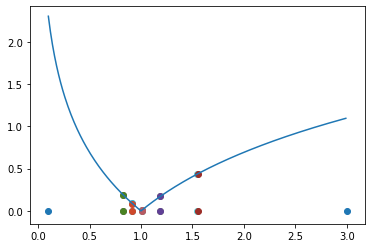

In [158]:
def test_func(x):
    return np.abs(np.log(x))

result_interval, table = DichotomyOneCalc(test_func, 0.1, 3, 0.1,0.001)

visualize_dichotomy(test_func, table)

print(table)

val = test_func(np.mean(result_interval))
print('\nInterval:', result_interval[0],result_interval[1], "\nValue in middle:", val)

# gif_dichotomy(func, steps_table, name = 'dichotomy')

           a         b     a - b         x         y      Q(x)      Q(y)
0   0.100000  3.000000  2.900000  1.207701  1.892299  0.188719  0.637792
1   0.100000  1.892299  1.792299  0.784597  1.207701  0.242585  0.188719
2   0.784597  1.892299  1.107701  1.207701  1.469194  0.188719  0.384714
3   0.784597  1.469194  0.684597  1.046090  1.207701  0.045059  0.188719
4   0.784597  1.207701  0.423104  0.946209  1.046090  0.055292  0.045059
5   0.946209  1.207701  0.261493  1.046090  1.107820  0.045059  0.102394
6   0.946209  1.107820  0.161611  1.007939  1.046090  0.007907  0.045059
7   0.946209  1.046090  0.099881  0.984360  1.007939  0.015764  0.007907
8   0.984360  1.046090  0.061730  1.007939  1.022511  0.007907  0.022262
9   0.984360  1.022511  0.038151  0.998932  1.007939  0.001068  0.007907
10  0.984360  1.007939  0.023579  0.993366  0.998932  0.006656  0.001068
11  0.993366  1.007939  0.014572  0.998932  1.002372  0.001068  0.002370
12  0.993366  1.002372  0.009006  0.996806  0.99893

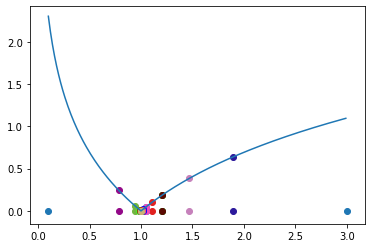

In [160]:
result_interval, table = GoldenSection(test_func, 0.1, 3, 0.01)

visualize_golden(test_func, table)

print(table)
val = test_func(np.mean(result_interval))
print('\nInterval:', result_interval[0],result_interval[1], "\nValue in middle:", val)

## Метод деления на три

In [161]:
import matplotlib.patches as pth
from matplotlib.patches import Rectangle as Rec
from time import sleep

class Rectangle:
    def __init__(self,x, y, w, h):
        self.x = x
        self.y = y
        self.h = h
        self.w = w
    
    def diam(self):
        return np.sqrt(self.h ** 2 + self.w ** 2)

    def get_center_coords(self):
        return [self.x + 0.5 * self.w, self.y + 0.5 * self.h]
    
    def split_on_three(self):
        if self.h >= self.w:
            return [Rectangle(self.x, self.y, self.w, self.h / 3.), \
                   Rectangle(self.x, self.y + self.h /3., self.w, self.h / 3.), \
                   Rectangle(self.x, self.y + 2 * self.h / 3., self.w, self.h / 3.)]
        else:
            return [Rectangle(self.x, self.y, self.w / 3., self.h), \
                   Rectangle(self.x + self.w / 3, self.y, self.w / 3., self.h), \
                   Rectangle(self.x + 2 * self.w / 3., self.y, self.w / 3., self.h)]
        
    def draw(self, ax):
        ax.add_patch(Rec((self.x,self.y), self.w, self.h, fill = False))
    
    def print_coords(self):
        return ' (' + str(self.x)[:3]           \
                +'; '+ str(self.y)[:5]        \
                +') ('+ str(self.x+self.w)[:5] \
                +';'+ str(self.y+self.h)[:5] + ')'

def make_data(func, x, y, w, h):
    X = np.arange(x, x + w, 0.05)
    Y = np.arange(y, y + h, 0.05)
    xgrid, ygrid = np.meshgrid(X, Y)
    zgrid = func(xgrid, ygrid)
    return xgrid, ygrid, zgrid             

def test_func_(x, y):
    return x ** 2 + y ** 2 

def coords_to_str(coords):
    
    return str()

def DivisionThreeMethod(func, x, y, w, h, l, eps, draw_flag = False, print_flag = False):
    
    def get_eval(Q, l, P):
        return Q - l * P.diam() / 2.
    
    # steps_table = pd.DataFrame(columns = ['minQ', 'minZ','rect_coords'])
    counter = 0
    
    rectangles = []
    E = Rectangle(x, y, w, h)
    rectangles += E.split_on_three()
    
    Q = [func(*rec.get_center_coords()) for rec in rectangles]
    arg_min_Q = Q.index(min(Q)) 
    
    Z = [get_eval(q, l, rec) for q, rec in zip(Q,rectangles)]
    arg_min_Z = Z.index(min(Z))
    
    if print_flag:
        print("\nStep #"+str(counter))
        print("Min Q "+str(min(Q))+"\nin rectangle" + rectangles[arg_min_Q].print_coords())
        print("\nMin eval "+str(min(Z))+"\nin rectangle"+ rectangles[arg_min_Z].print_coords())
    
    while Q[arg_min_Q] - Z[arg_min_Z] > eps:
        Q += [func(*rec.get_center_coords()) for rec in rectangles[arg_min_Z].split_on_three()]
        Z += [get_eval(q, l, rec) for q, rec in zip(Q[-3:], rectangles[arg_min_Z].split_on_three())]
        rectangles += rectangles[arg_min_Z].split_on_three()
        rectangles.pop(arg_min_Z)
        Q.pop(arg_min_Z)
        Z.pop(arg_min_Z)
        arg_min_Q = Q.index(min(Q))
        arg_min_Z = Z.index(min(Z))
        if print_flag:
            print("\nStep #"+str(counter))
            print("Min Q "+str(min(Q))+" in rectangle" + rectangles[arg_min_Q].print_coords())
            print("Min eval "+str(min(Z))+" in rectangle"+ rectangles[arg_min_Z].print_coords())
        counter += 1
    
    if draw_flag:
        xgrid, ygrid, zgrid = make_data(func, x, y, w, h)
        levels = np.cumsum(np.arange(0.1, 15 , 1))
        cs = plt.contour(xgrid, ygrid, zgrid, levels)
        plt.clabel(cs, colors="#000000")
        [r.draw(ax) for r in rectangles]
        plt.xlim(x,x + w)
        plt.ylim(y ,y + h)
        plt.show()
    return Q[arg_min_Q], rectangles[arg_min_Q]


Step #0
Min Q 5.0
in rectangle (-3; -3) (7;1.0)

Min eval -0.38516480713450374
in rectangle (-3; -3) (7;1.0)

Step #0
Min Q 2.7777777777777777 in rectangle (-3; -3) (0.333;1.0)
Min eval 0.1743612191422259 in rectangle (-3; -3) (0.333;1.0)

Step #1
Min Q 1.8888888888888886 in rectangle (-3; -0.33) (0.333;0.999)
Min eval 0.0938339531773873 in rectangle (-3; -0.33) (0.333;0.999)

Step #2
Min Q 0.16049382716049365 in rectangle (-0.; -0.33) (0.333;0.999)
Min eval -0.7073116923846902 in rectangle (-0.; -0.33) (0.333;0.999)

Step #3
Min Q 0.06172839506172837 in rectangle (-0.; -0.33) (0.333;0.111)
Min eval -0.5366232501754388 in rectangle (-0.; -0.33) (0.333;0.111)

Step #4
Min Q 0.03429355281207142 in rectangle (-0.; -0.33) (0.333;0.111)
Min eval -0.43785781807667346 in rectangle (-0.; 0.111) (0.333;0.555)

Step #5
Min Q 0.03429355281207142 in rectangle (-0.; -0.33) (0.333;0.111)
Min eval -0.25497495370298984 in rectangle (-0.; -0.33) (0.333;0.111)

Step #6
Min Q 0.023319615912208547 in rec

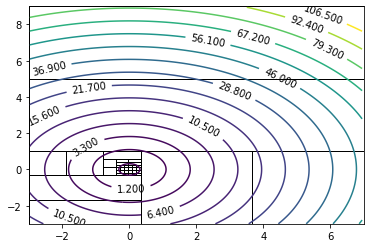

Result:
Val = 0.0019814052735863397 in center rectangle (-0.; -0.03) (0.086;0.111)


In [162]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.gca()
resQ, resR = DivisionThreeMethod(test_func_,-3 , -3, 10, 12,1,0.1, draw_flag = True, print_flag = True)

print('Result:\nVal = '+str(resQ) + ' in center rectangle' + resR.print_coords())